<a href="https://colab.research.google.com/github/Kanchan786786/Capstone_project-/blob/main/Capstone%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

! apt-get install git

Mounted at /content/drive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [2]:
!git clone https://github.com/Kanchan786786/Capstone_project-.git

Cloning into 'Capstone_project-'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 29 (delta 9), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 896.73 KiB | 3.07 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/Kanchan786786/Capstone_project-/main/Monday_Prices.xlsx"
df = pd.read_excel(url)

In [ ]:
# 1. Basic Information
print("\nDataset Information:\n")
print(df.info())

# 2. Summary Statistics
print("\nSummary Statistics:\n")
print(df.describe())

# 3. Checking for Missing Values
print("\nMissing Values:\n")
print(df.isnull().sum())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101 entries, 0 to 2100
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Price                   2101 non-null   datetime64[ns]
 1   Week Date               2101 non-null   object        
 2   Close                   2101 non-null   float64       
 3   High                    2101 non-null   float64       
 4   Low                     2101 non-null   float64       
 5   Open                    2101 non-null   float64       
 6   Volume                  2101 non-null   int64         
 7   VWAP                    2101 non-null   float64       
 8   Adjusted Close          2101 non-null   float64       
 9   Market Cap              2101 non-null   int64         
 10  Bid Price               2101 non-null   float64       
 11  Ask Price               2101 non-null   float64       
 12  SMA_50                  2

In [ ]:
df.head()

,Price,Week Date,Close,High,Low,Open,Volume,VWAP,Adjusted Close,Market Cap,Bid Price,Ask Price,SMA_50,EMA_50,RSI,MACD,MACD_Signal,MACD_Hist,Target Variable - High,Target Variable - Low
0,1980-12-15,Mon,0.093678,0.094108,0.093678,0.094108,175884800,0.093821,0.093678,3572854423552,237.32,250.59,NaN,NaN,NaN,NaN,NaN,NaN,0.102273,0.101842
1,1980-12-22,Mon,0.101842,0.102273,0.101842,0.101842,37363200,0.101986,0.101842,3572854423552,237.32,250.59,NaN,NaN,NaN,NaN,NaN,NaN,0.124188,0.123758
2,1980-12-29,Mon,0.123758,0.124188,0.123758,0.123758,93161600,0.123901,0.123758,3572854423552,237.32,250.59,NaN,NaN,NaN,NaN,NaN,NaN,0.116453,0.116024
3,1981-01-05,Mon,0.116024,0.116453,0.116024,0.116453,35728000,0.116167,0.116024,3572854423552,237.32,250.59,NaN,NaN,64.735381,NaN,NaN,NaN,0.109577,0.108718
4,1981-01-12,Mon,0.108718,0.109577,0.108718,0.109577,23699200,0.109005,0.108718,3572854423552,237.32,250.59,NaN,NaN,52.729392,NaN,NaN,NaN,0.113445,0.113015


In [ ]:
# Rename columns
new_columns = {col: col.replace(' ', '_').replace('Price', 'Date').replace('Week_Date', 'Day') for col in df.columns}
df = df.rename(columns=new_columns)

print(df.head())


        Date  Day     Close      High       Low      Open     Volume  \
0 1980-12-15  Mon  0.093678  0.094108  0.093678  0.094108  175884800   
1 1980-12-22  Mon  0.101842  0.102273  0.101842  0.101842   37363200   
2 1980-12-29  Mon  0.123758  0.124188  0.123758  0.123758   93161600   
3 1981-01-05  Mon  0.116024  0.116453  0.116024  0.116453   35728000   
4 1981-01-12  Mon  0.108718  0.109577  0.108718  0.109577   23699200   

       VWAP  Adjusted_Close     Market_Cap  Bid_Date  Ask_Date  SMA_50  \
0  0.093821        0.093678  3572854423552    237.32    250.59     NaN   
1  0.101986        0.101842  3572854423552    237.32    250.59     NaN   
2  0.123901        0.123758  3572854423552    237.32    250.59     NaN   
3  0.116167        0.116024  3572854423552    237.32    250.59     NaN   
4  0.109005        0.108718  3572854423552    237.32    250.59     NaN   

   EMA_50        RSI  MACD  MACD_Signal  MACD_Hist  Target_Variable_-_High  \
0     NaN        NaN   NaN          NaN     

In [ ]:


# Strategy 1: Numerical Columns (e.g., prices)
# For numerical columns, we can use imputation methods like mean, median, or mode.
# We'll use the mean for demonstration.  You might choose median if there are outliers.

numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if df[col].isnull().any():  # Check if the column actually has missing values
        df[col] = df[col].fillna(df[col].mean()) #Fill with mean


# Strategy 2: Categorical Columns (if any)
# For categorical columns, we can use the mode (most frequent value)
#  or a special value like 'Unknown'.

categorical_cols = df.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
  if df[col].isnull().any(): #check if the column has any null values
    df[col] = df[col].fillna(df[col].mode()[0])


#Verify if there are any null values left
print("\nMissing Values After Handling:\n")
print(df.isnull().sum())



Missing Values After Handling:

Date                      0
Day                       0
Close                     0
High                      0
Low                       0
Open                      0
Volume                    0
VWAP                      0
Adjusted_Close            0
Market_Cap                0
Bid_Date                  0
Ask_Date                  0
SMA_50                    0
EMA_50                    0
RSI                       0
MACD                      0
MACD_Signal               0
MACD_Hist                 0
Target_Variable_-_High    0
Target_Variable_-_Low     0
dtype: int64


In [ ]:

import pandas as pd
import numpy as np
# Display data types of each column
df.dtypes


,0
Date,datetime64[ns]
Day,object
Close,float64
High,float64
Low,float64
Open,float64
Volume,int64
VWAP,float64
Adjusted_Close,float64
Market_Cap,int64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.0015 - val_loss: 0.0069
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 8.6849e-05 - val_loss: 0.0127
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 5.0920e-05 - val_loss: 0.0258
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 4.3132e-05 - val_loss: 0.0351
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 3.3591e-05 - val_loss: 0.0298
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 4.2223e-05 - val_loss: 0.0351
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.8565e-05 - val_loss: 0.0390
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.8185e-05 - val_loss: 0.0427
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.5700e-05 - val_loss: 0.0522
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 1.8252e-05 - val_loss: 0.0426
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 2.6564e-05 - val_loss: 0.0515
Epoch 12/50
51/51 ━━━━━

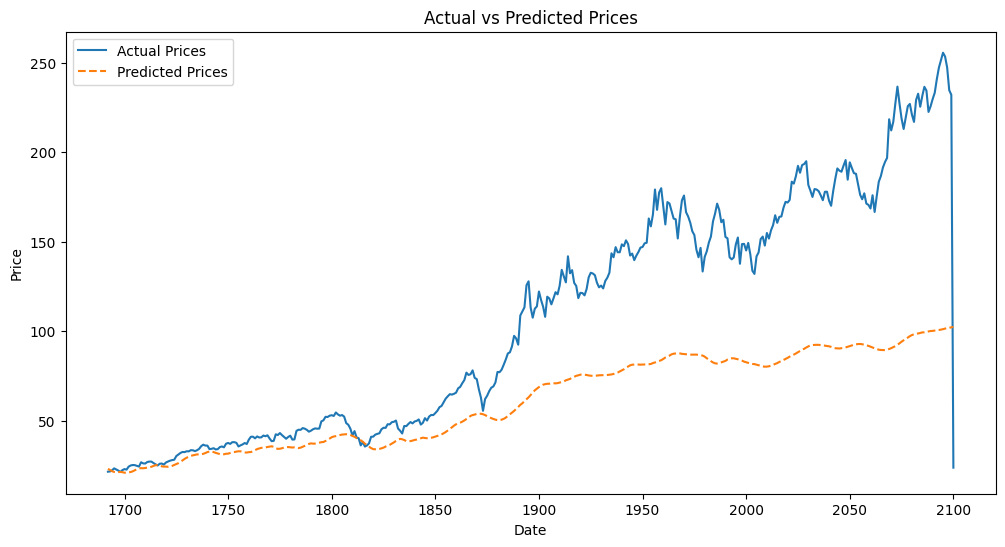

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Select features and target variable
features = ['Close', 'High', 'Low', 'Open', 'Volume', 'SMA_50', 'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']
target = 'Target_Variable_-_High'

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features + [target]]), columns=features + [target], index=df.index)

# Prepare sequences for LSTM
def create_sequences(data, feature_cols, target_col, time_steps=60):
    np.random.seed(42)
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[feature_cols].iloc[i:i+time_steps].values)
        y.append(data[target_col].iloc[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 60  # Use past 60 days for prediction
X, y = create_sequences(df_scaled, features, target, time_steps)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False,random_state=42)

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25,activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
predictions_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], predictions.reshape(-1, 1)), axis=1))[:, -1]
y_test_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test_inv, label="Actual Prices")
plt.plot(df.index[-len(y_test):], predictions_inv, label="Predicted Prices", linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("Actual vs Predicted Prices")
plt.show()


Mean Squared Error on Test Data: 0.05847270414233208
R-squared on Test Data: 0.1253308270856459

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          12,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,705 (397.29 KB)

 Trainable params: 33,901 (132.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 67,804 (264.86 KB)


Training History:
dict_keys(['loss', 'val_loss'])


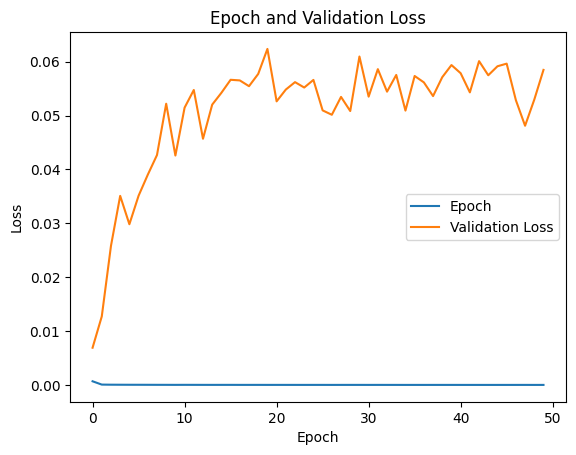

In [ ]:


import matplotlib.pyplot as plt
# Assuming your model and data are already loaded as in the provided code.

# Evaluate the model (example using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Squared Error on Test Data: {loss}")

# Calculate R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(y_test_inv, predictions_inv)
print(f"R-squared on Test Data: {r_squared}")


# Additional model summary information
print("\nModel Summary:")
model.summary()

# Access training history
print("\nTraining History:")
print(history.history.keys()) #prints all the metrics available in training history
# Example of plotting training and validation loss
plt.plot(history.history['loss'], label='Epoch')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Epoch and Validation Loss')
plt.show()


In [ ]:
# prompt: check the accuraacy for X_train, y_train on my above modle

import numpy as np
# Assuming your model and data are already loaded as in the provided code.

# Evaluate the model on training data
train_loss = model.evaluate(X_train, y_train, verbose=0)
print(f"Mean Squared Error on Training Data: {train_loss}")

# Make predictions on training data
train_predictions = model.predict(X_train)

# Inverse transform the predictions and actual values for training data
train_predictions_inv = scaler.inverse_transform(np.concatenate((X_train[:, -1, :], train_predictions.reshape(-1, 1)), axis=1))[:, -1]
y_train_inv = scaler.inverse_transform(np.concatenate((X_train[:, -1, :], y_train.reshape(-1, 1)), axis=1))[:, -1]

# Calculate R-squared for training data
r_squared_train = r2_score(y_train_inv, train_predictions_inv)
print(f"R-squared on Training Data: {r_squared_train}")


Mean Squared Error on Training Data: 1.2425819477357436e-05
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
R-squared on Training Data: 0.9833521835611395


In [ ]:
# prompt: Now chack same on testing dataaccuracy

import matplotlib.pyplot as plt
import numpy as np


# Evaluate the model (example using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Squared Error on Test Data: {loss}")

# Calculate R-squared
r_squared = r2_score(y_test_inv, predictions_inv)
print(f"R-squared on Test Data: {r_squared}")


# Additional model summary information
print("\nModel Summary:")
model.summary()






Mean Squared Error on Test Data: 0.05847270414233208
R-squared on Test Data: 0.1253308270856459

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          12,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,705 (397.29 KB)

 Trainable params: 33,901 (132.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 67,804 (264.86 KB)



### Model Explanation:

#### This code builds and trains a Long Short-Term Memory (LSTM) network to predict the 'Target_Variable_-_High'
#### (likely a stock price) based on various features (e.g., closing price, volume, technical indicators).

#### 1. Data Preprocessing:

##### Data is loaded from an Excel file and preprocessed to handle missing values.
##### Features are normalized to the range [0, 1] using MinMaxScaler, which improves the training process.
##### The data is transformed into sequences of past observations, suitable for the LSTM.  The `time_steps` variable (set to 60) indicates the LSTM will look at the past 60 time steps to predict the next one.


### 2. LSTM Model Architecture:

#### The model consists of:

####  Two LSTM layers: LSTM layers are designed to process sequential data, capturing long-term dependencies in the time series.  
####  The first LSTM layer returns its sequences, meaning the output of this layer is still a sequence of vectors. This is importantfor the second LSTM layer. The second LSTM layer does not return sequences.  `return_sequences=False` means it processes the whole sequence of output vectors from the first LSTM layer and outputs a single vector. Each layer has 50 units, which can be thought of as the dimensionality of the internal representation (hidden state) of the LSTM.
####  Dropout layers: Dropout is a regularization technique that randomly drops units during training, helping prevent overfitting.
#### Dense layers: A fully connected layer with 25 neurons, and a final output layer with one neuron to predict the target variable.


### 3. Training and Evaluation:

#### The model is compiled with the Adam optimizer and mean squared error (MSE) loss function. MSE is well suited for regression tasks
#### Training history is saved into the `history` variable.  This lets you plot training loss vs. validation loss.


### 4. What LSTM is doing:
####  LSTM layers are designed to address the vanishing gradient problem, which makes it difficult for traditional recurrent networks to learn long-range dependencies. LSTMs use a clever internal mechanism called gates, (input, output, forget).  These gates control how much of the past information is remembered or forgotten as new data comes in.


### 5. Insights:
####  The R-squared values for the training and test sets reveal how well the model fits the data and how generalizable the model is to unseen data.
####  Comparing the plots of actual vs. predicted values is crucial to assess the model's predictive power.  

### Further Analysis:
#### Examine the training history to detect any overfitting.
#### Experiment with different hyperparameters (e.g., number of LSTM layers, number of units, dropout rates, time steps).

